In [ ]:

import pandas as pd
import json

dataset = pd.read_csv('jobs_with_skills.csv')

#remove all listed with zero skills
dataset['skills'] = dataset['skills'].where(pd.notnull(dataset['skills']), None)
dataset = dataset[dataset['skill_count'] != 0]

#print((dataset['skill_count'] == 0).sum()) #testing

#convert json object of skills to list
dataset['data_dict'] = dataset['skill_counts_json'].apply(json.loads)
dataset['skill_list'] = dataset['data_dict'].apply(lambda x: [k.lower() for k in x.keys()])

#user input for skill search
skills_input = ['Java, Python'] #temp
#skills_input = input("Enter skills to search for (comma-separated): ")
skills_search = [skill.strip().lower for skill in skills_input.split(',')]

#query list in row for input skills
def has_match(data_values, search_values_set):
    return any(val in search_values_set for val in data_values)

search_values_set = set(skills_search)
#filters dataset to search values
matching_rows = dataset[dataset['skill_list'].apply(lambda x: has_match(x, search_values_set))]

#print(matching_rows) #temp output
dataset.head()

Enter skills to search for (comma-separated):  Go


Empty DataFrame
Columns: [source, company, title, location, url, skills, skill_count, skill_counts_json, data_dict, skill_list]
Index: []


,source,company,title,location,url,skills,skill_count,skill_counts_json,data_dict,skill_list
0,greenhouse,trase,"Director of Product Management, National Security","McLean, VA",https://job-boards.greenhouse.io/trase/jobs/47...,"Go, TypeScript",2,"{""TypeScript"":1,""Go"":2}","{'TypeScript': 1, 'Go': 2}","[typescript, go]"
2,greenhouse,trase,"ML Engineer, Applied Machine Learning","Seattle, WA",https://job-boards.greenhouse.io/trase/jobs/47...,"PyTorch, Python, TensorFlow",3,"{""Python"":1,""TensorFlow"":1,""PyTorch"":1}","{'Python': 1, 'TensorFlow': 1, 'PyTorch': 1}","[python, tensorflow, pytorch]"
3,greenhouse,trase,"ML Researcher, Applied Machine Learning","Seattle, WA",https://job-boards.greenhouse.io/trase/jobs/47...,"PyTorch, Python, TensorFlow",3,"{""Python"":1,""TensorFlow"":1,""PyTorch"":1}","{'Python': 1, 'TensorFlow': 1, 'PyTorch': 1}","[python, tensorflow, pytorch]"
4,greenhouse,trase,Principal MLOps Engineer,"Remote; Seattle, WA; McClean, VA",https://job-boards.greenhouse.io/trase/jobs/49...,"AWS, Azure, CI/CD, Docker, GCP, GitHub Actions...",10,"{""Python"":1,""AWS"":1,""GCP"":1,""Azure"":1,""Docker""...","{'Python': 1, 'AWS': 1, 'GCP': 1, 'Azure': 1, ...","[python, aws, gcp, azure, docker, kubernetes, ..."
5,greenhouse,trase,"Principal Software Engineer, Backend Engineeri...","Remote; Seattle, WA; McLean, VA",https://job-boards.greenhouse.io/trase/jobs/49...,"AWS, Azure, Docker, GCP, Go, Kubernetes, Pytho...",11,"{""Python"":1,""TypeScript"":1,""Go"":1,""gRPC"":1,""RE...","{'Python': 1, 'TypeScript': 1, 'Go': 1, 'gRPC'...","[python, typescript, go, grpc, rest, aws, gcp,..."


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2646 entries, 0 to 3191
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   source             2646 non-null   object
 1   company            2646 non-null   object
 2   title              2646 non-null   object
 3   location           2638 non-null   object
 4   url                2646 non-null   object
 5   skills             2646 non-null   object
 6   skill_count        2646 non-null   int64 
 7   skill_counts_json  2646 non-null   object
 8   data_dict          2646 non-null   object
 9   skill_list         2646 non-null   object
dtypes: int64(1), object(9)
memory usage: 227.4+ KB


In [15]:
dataset['skill_counts_json'].value_counts()

skill_counts_json
{"Next.js":1}                                                                                                            145
{"Go":1}                                                                                                                  78
{"Python":1}                                                                                                              69
{"Python":1,"SQL":1}                                                                                                      51
{"Spring":1}                                                                                                              40
                                                                                                                        ... 
{"Python":1,"JavaScript":1,"Next.js":2,"AWS":1,"GCP":1,"Azure":1,"Docker":1,"Kubernetes":1}                                1
{"Python":1,"Shell":1}                                                                                     

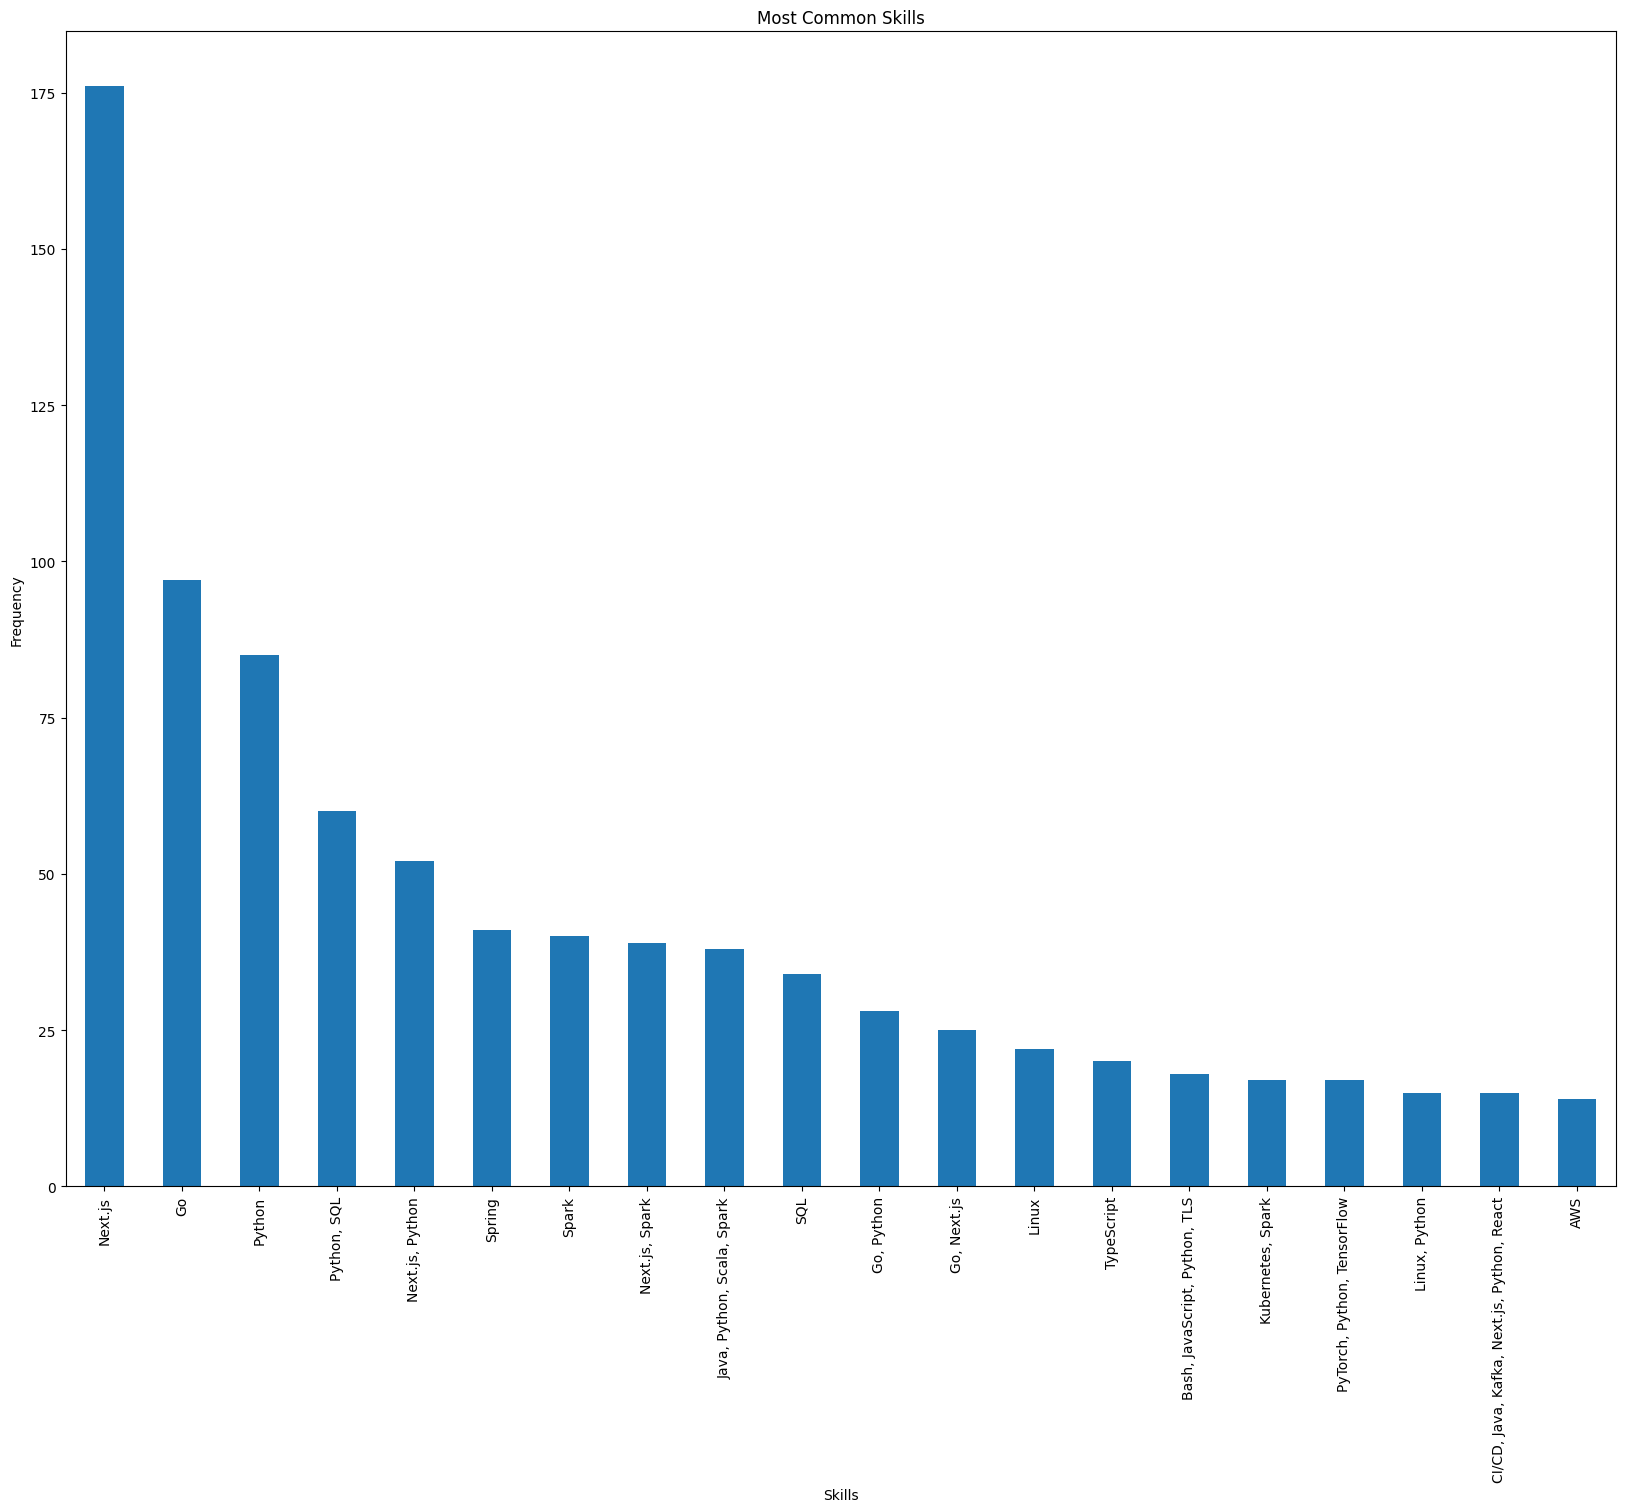

In [25]:
%matplotlib inline 
import matplotlib.pyplot as plt
skill_counts = dataset['skills'].value_counts().head(20)
plt.figure(figsize=(20,15))
skill_counts.plot(kind='bar')
plt.title('Most Common Skills')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()